## ローパスフィルタの自作関数

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def lowpassFilter(img, msize=30):
  dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  rows, cols = img.shape
  crow, ccol = rows // 2 , cols // 2

  # create a mask first, center square is 1, remaining all zeros
  mask = np.zeros((rows, cols, 2), np.uint8)
  mask[crow-msize : crow+msize, ccol-msize : ccol+msize] = 1

  # apply mask and inverse DFT
  fshift = dft_shift * mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

  # 0~255で正規化
  img_back_max = img_back.max()
  img_back2 = (img_back * 255) / img_back_max
  img_back2 = img_back2.astype(np.uint8)
  return img_back2

## 画像プロットの自作関数

In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib

def plotImg(noise, imp, org, plt, noimg=False, nopsnr=False):
  matplotlib.rcParams["font.family"] = "Meiryo"
  if not noimg:
    plt.figure(figsize=(12,5))
    # 画像をプロット
    plt.subplot(131).imshow(org, cmap="gray"), plt.title("元画像")
    plt.subplot(132).imshow(noise, cmap="gray"), plt.title("ノイズ付き画像")
    plt.subplot(133).imshow(imp, cmap="gray"), plt.title("ノイズ除去後画像")
    plt.show()
    
  noise_psnr = cv2.PSNR(org, noise)
  imp_psnr = cv2.PSNR(org, imp)
  if not nopsnr:
    # PSNRを表示
    print("noize PSNR =", noise_psnr)
    print("improvement PSNR =", imp_psnr)
    print("diff PSNR = ", imp_psnr-noise_psnr)

  return imp_psnr - noise_psnr

## ノイズ画像とメディアンフィルタをかけた画像の画素値の分布

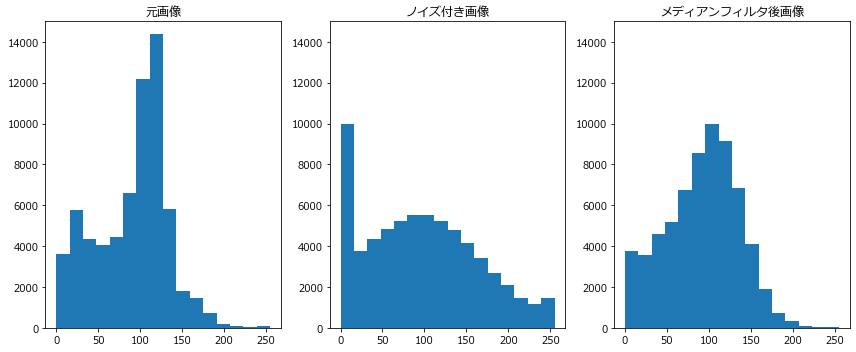

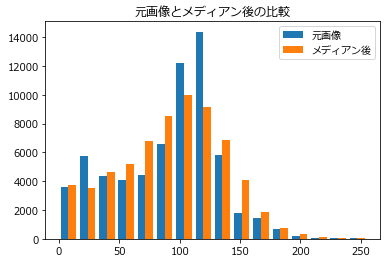

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

dst = cv2.medianBlur(noise, 3)

plt.figure(figsize=(12,5))
plt.subplot(131).hist(np.ravel(org), bins=16); plt.title("元画像")
plt.ylim(0, 15000)
plt.subplot(132).hist(np.ravel(noise), bins=16); plt.title("ノイズ付き画像")
plt.ylim(0, 15000)
plt.subplot(133).hist(np.ravel(dst), bins=16); plt.title("メディアンフィルタ後画像")
plt.ylim(0, 15000)
plt.tight_layout()
plt.show()

rcParams["font.family"] = "Meiryo"
plt.hist([np.ravel(org), np.ravel(dst)], bins=16, label=["元画像", "メディアン後"]); plt.title("元画像とメディアン後の比較")
plt.legend()
plt.show()

## メディアンフィルタをかけたときの画素値が0の画素と255の画素

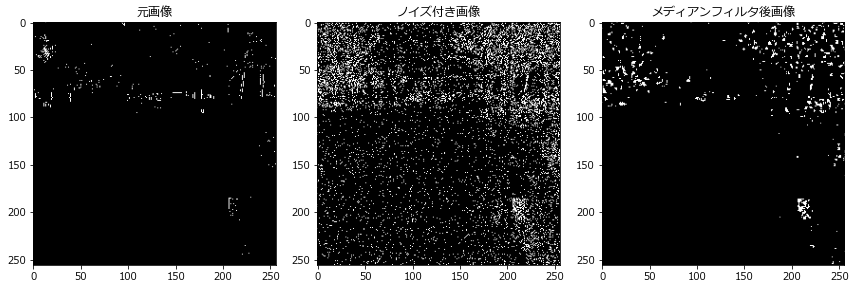

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

img = np.zeros((noise.shape))
img += noise == 0
img += noise == 255

img2 = np.zeros((org.shape))
img2 += org == 0
img2 += org == 255

median = cv2.medianBlur(noise, 3)
img3 = np.zeros((median.shape))
img3 += median == 0
img3 += median == 255

plt.figure(figsize=(12,5))
plt.subplot(131).imshow(img2, cmap="gray"); plt.title("元画像")
plt.subplot(132).imshow(img, cmap="gray"); plt.title("ノイズ付き画像")
plt.subplot(133).imshow(img3, cmap="gray"); plt.title("メディアンフィルタ後画像")
plt.tight_layout()
plt.show()

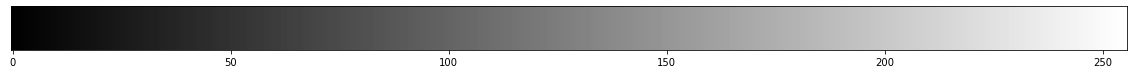

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.array(np.arange(256))
img2 = np.append(img, img)
for i in range(8):
  img2 = np.append(img2, img)
img2 = img2.reshape(10, 256)

plt.figure(figsize=(20, 5))
plt.imshow(img2, cmap="gray")
plt.yticks([])
plt.show()

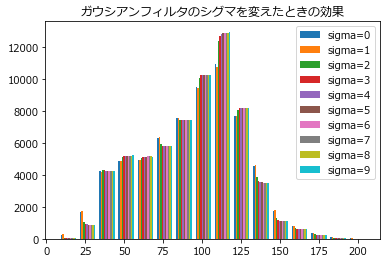

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

dst = lowpassFilter(noise, 50)

dst_l = []
sigma = range(10)
for s in sigma:
  dst_l.append(np.ravel(cv2.GaussianBlur(dst, ksize=(5, 5), sigmaX = int(s))))

# plt.figure(figsize=[12, 10])
plt.hist(dst_l, bins=16, label=list(map(lambda x: "sigma="+str(x), sigma))); plt.title("ガウシアンフィルタのシグマを変えたときの効果")
plt.legend()
plt.show()

[[4.92333887e-05 5.28196586e-05 5.66357963e-05 ... 5.66357963e-05
  5.28196586e-05 4.92333887e-05]
 [5.28196586e-05 5.66671604e-05 6.07612741e-05 ... 6.07612741e-05
  5.66671604e-05 5.28196586e-05]
 [5.66357963e-05 6.07612741e-05 6.51511811e-05 ... 6.51511811e-05
  6.07612741e-05 5.66357963e-05]
 ...
 [5.66357963e-05 6.07612741e-05 6.51511811e-05 ... 6.51511811e-05
  6.07612741e-05 5.66357963e-05]
 [5.28196586e-05 5.66671604e-05 6.07612741e-05 ... 6.07612741e-05
  5.66671604e-05 5.28196586e-05]
 [4.92333887e-05 5.28196586e-05 5.66357963e-05 ... 5.66357963e-05
  5.28196586e-05 4.92333887e-05]]


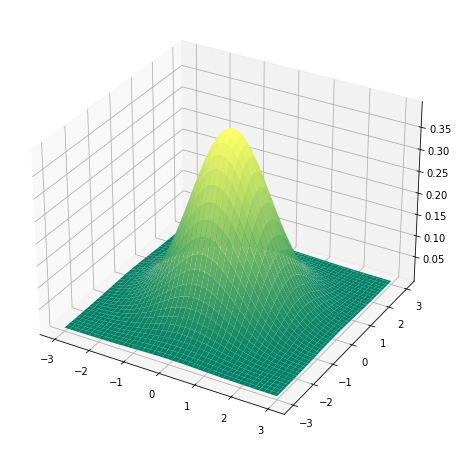

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1
# x = np.linspace(-1, 1, 3)
# y = np.linspace(-1, 1, 3)
x = np.linspace(-3, 3, 256)
y = np.linspace(-3, 3, 256)
X, Y = np.meshgrid(x, y)

Z = 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-(X**2 + Y**2)/(2 * sigma**2))
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="summer")
plt.show()

<IPython.core.display.Javascript object>


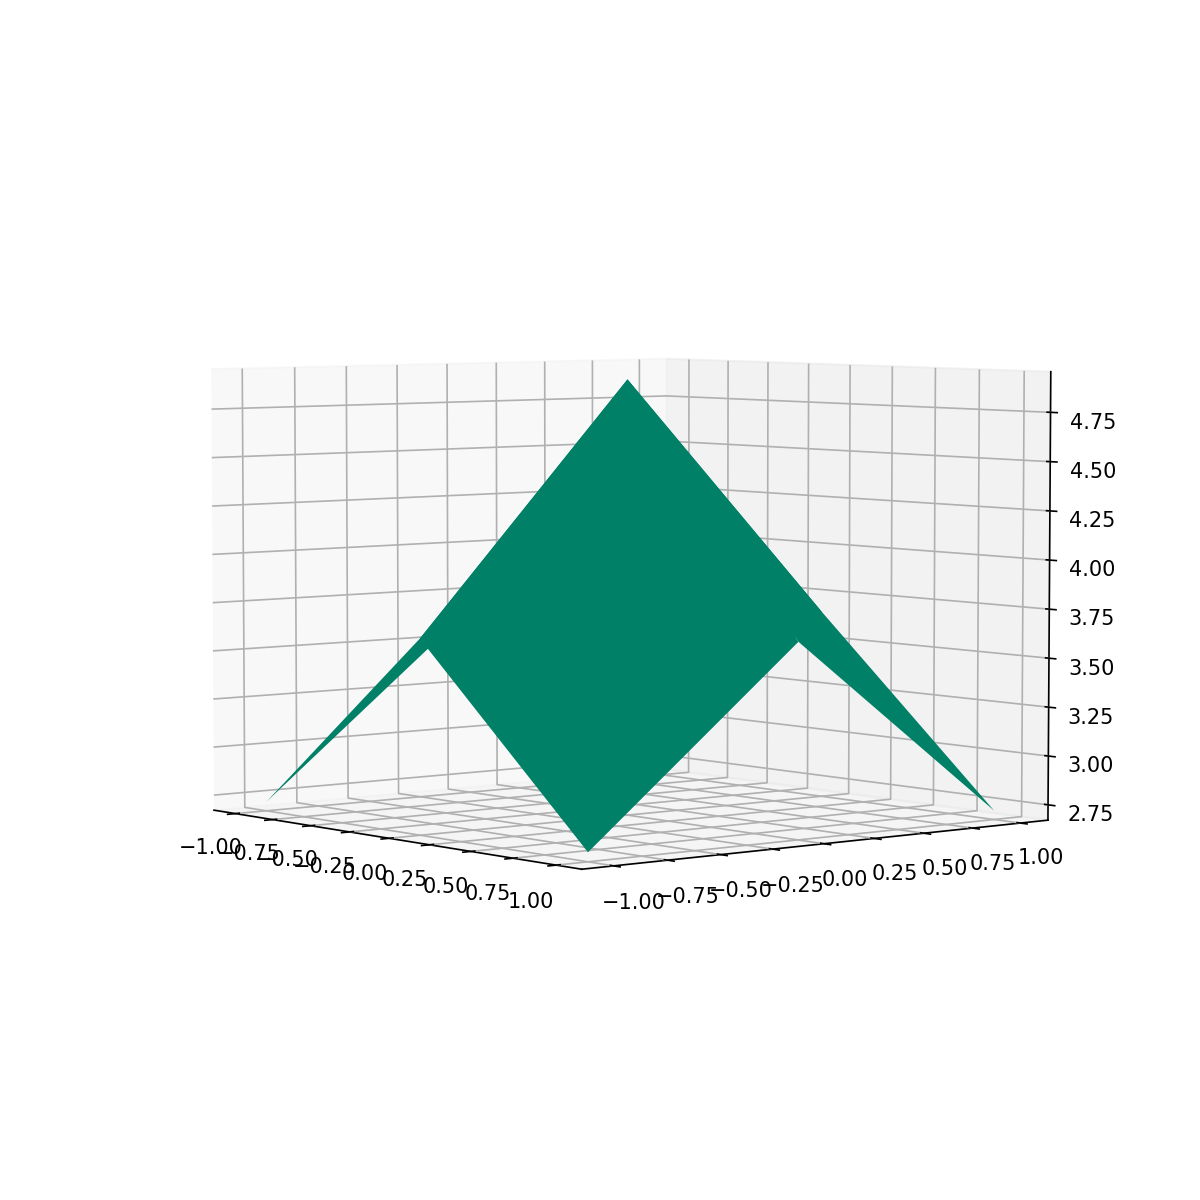

In [5]:
%matplotlib notebook
x = np.arange(-1, 2, 1)
y = np.arange(-1, 2, 1)
x, y = np.meshgrid(x, y)

sigma = 1.3
kernel = 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-(x**2 + y**2)/(2 * sigma**2)) * 16
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, kernel, cmap="summer")
plt.show()